## import necessary libraries

In [24]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## mount the google drive to access the dataset

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## read the dataset

In [12]:
df = pd.read_csv('/content/drive/MyDrive/DataCoSupplyChainDataset.csv', encoding='unicode_escape')

#EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
df.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


## perform necessary data preprocessing

In [14]:
# drop unnecessary columns
df = df.drop(columns=['Customer Email', 'Product Description','Category Name','Customer Password','order date (DateOrders)','shipping date (DateOrders)'])

In [15]:
# remove NaN values
df = df.dropna()

In [16]:
# encode categorical columns
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
df['Delivery Status'] = le.fit_transform(df['Delivery Status'])
df['Customer City'] = le.fit_transform(df['Customer City'])
df['Customer Country'] = le.fit_transform(df['Customer Country'])
df['Customer Fname'] = le.fit_transform(df['Customer Fname'])
df['Customer Lname'] = le.fit_transform(df['Customer Lname'])
df['Customer Segment'] = le.fit_transform(df['Customer Segment'])
df['Customer State'] = le.fit_transform(df['Customer State'])
df['Customer Street'] = le.fit_transform(df['Customer Street'])
df['Department Name'] = le.fit_transform(df['Department Name'])
df['Market'] = le.fit_transform(df['Market'])
df['Order City'] = le.fit_transform(df['Order City'])
df['Order Country'] = le.fit_transform(df['Order Country'])
df['Order Region'] = le.fit_transform(df['Order Region'])
df['Order State'] = le.fit_transform(df['Order State'])
df['Order Status'] = le.fit_transform(df['Order Status'])
df['Product Image'] = le.fit_transform(df['Product Image'])
df['Product Name'] = le.fit_transform(df['Product Name'])
df['Shipping Mode'] = le.fit_transform(df['Shipping Mode'])

## Data visualization

<Axes: >

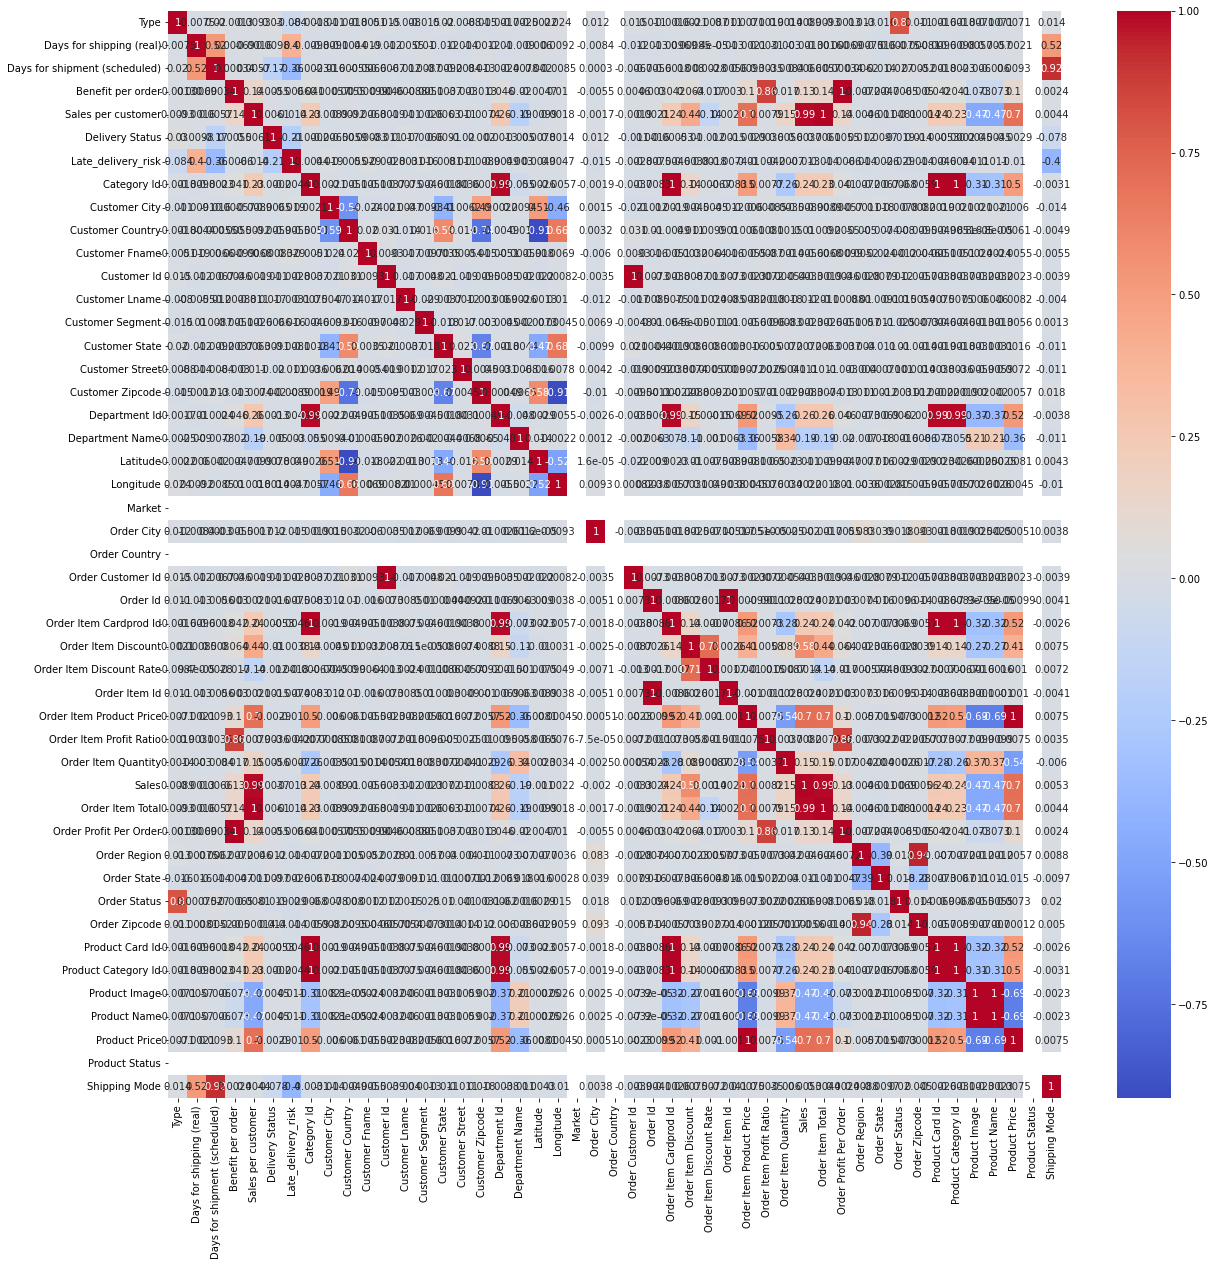

In [17]:
# correlation plot
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='Sales', ylabel='Benefit per order'>

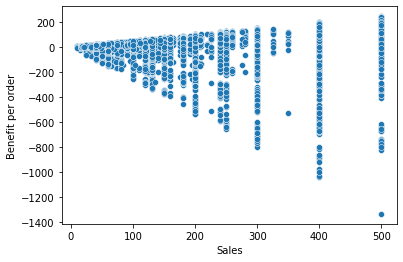

In [18]:
# scatter plot
sns.scatterplot(x='Sales', y='Benefit per order', data=df)

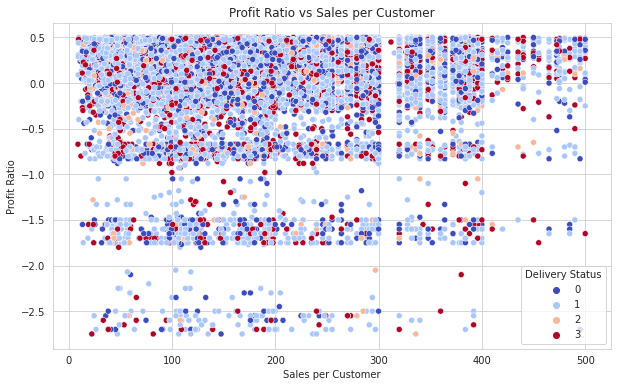

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales per customer', y='Order Item Profit Ratio', data=df, hue='Delivery Status', palette='coolwarm')
plt.title('Profit Ratio vs Sales per Customer')
plt.xlabel('Sales per Customer')
plt.ylabel('Profit Ratio')
plt.show()

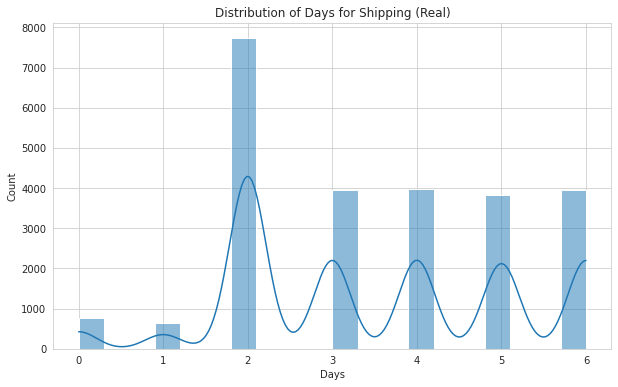

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Days for shipping (real)', bins=20, kde=True)
plt.title('Distribution of Days for Shipping (Real)')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

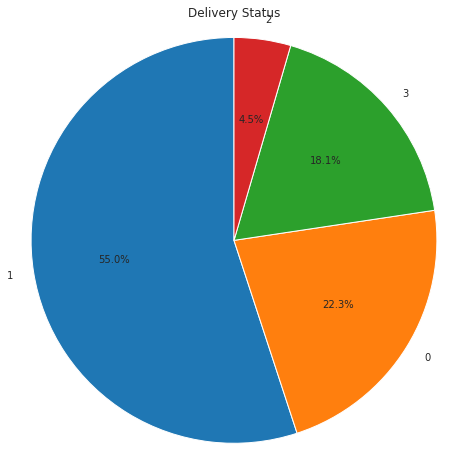

In [36]:
delivery_status_count = df['Delivery Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(delivery_status_count, labels=delivery_status_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Delivery Status')
plt.axis('equal')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24840 entries, 55 to 179406
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           24840 non-null  int64  
 1   Days for shipping (real)       24840 non-null  int64  
 2   Days for shipment (scheduled)  24840 non-null  int64  
 3   Benefit per order              24840 non-null  float64
 4   Sales per customer             24840 non-null  float64
 5   Delivery Status                24840 non-null  int64  
 6   Late_delivery_risk             24840 non-null  int64  
 7   Category Id                    24840 non-null  int64  
 8   Customer City                  24840 non-null  int64  
 9   Customer Country               24840 non-null  int64  
 10  Customer Fname                 24840 non-null  int64  
 11  Customer Id                    24840 non-null  int64  
 12  Customer Lname                 24840 non-nul

In [ ]:
df.dropna

## split the dataset into train and test sets

In [20]:
X = df.drop(columns=['Late_delivery_risk'])
y = df['Late_delivery_risk']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## classification models

In [31]:
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print('Accuracy Score for Decision Tree Classifier:', accuracy_dtc)

Accuracy Score for Decision Tree Classifier: 1.0


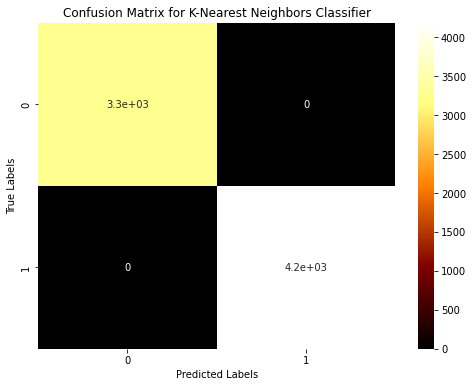

In [27]:
# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_dtc, annot=True, cmap='afmhot', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()

In [30]:
# Print model summary
print("Model Summary: Decision Tree Classifier")
print("Max depth: ", dtc.get_depth())
print("Accuracy score: {:.2f}%".format(accuracy_dtc*100))

Model Summary: Decision Tree Classifier
Max depth:  2
Accuracy score: 100.00%


In [28]:
# k-nearest neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy Score for K-Nearest Neighbors Classifier: ',accuracy_knn)

Accuracy Score for K-Nearest Neighbors Classifier:  0.7355072463768116


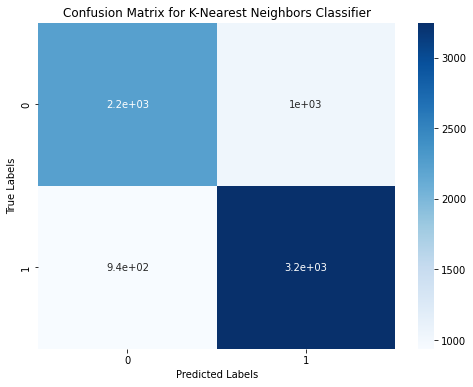

In [26]:
# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()

In [29]:
# Print model summary
print("Model Summary: K-Nearest Neighbors Classifier")
print("Number of neighbors: ", knn.n_neighbors)
print("Accuracy score: {:.2f}%".format(accuracy_knn*100))

Model Summary: K-Nearest Neighbors Classifier
Number of neighbors:  5
Accuracy score: 73.55%
